In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam

# Data augmentation for training set

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)

In [3]:
# Load the dataset
dataset_path = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/UMS Dataset'

# training set
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training set
)

# Validation set
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation set
)

Found 389 images belonging to 9 classes.
Found 94 images belonging to 9 classes.


# Model layout

In [4]:
# Base InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Additional layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# Add a fully connected layer with softmax activation
predictions = Dense(9, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [5]:
history = model.fit(train_generator, validation_data =validation_generator, epochs = 5)

Epoch 1/5
25/25 [==============================] - 118s 5s/step - loss: 1.0206 - accuracy: 0.7789 - val_loss: 0.7793 - val_accuracy: 0.7660
Epoch 2/5
25/25 [==============================] - 103s 4s/step - loss: 0.1449 - accuracy: 0.9974 - val_loss: 0.3936 - val_accuracy: 0.8830
Epoch 3/5
25/25 [==============================] - 104s 4s/step - loss: 0.0547 - accuracy: 1.0000 - val_loss: 0.2545 - val_accuracy: 0.9468
Epoch 4/5
25/25 [==============================] - 106s 4s/step - loss: 0.0314 - accuracy: 0.9974 - val_loss: 0.2367 - val_accuracy: 0.9574
Epoch 5/5
25/25 [==============================] - 103s 4s/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.1967 - val_accuracy: 0.9574


# Save the Model

In [8]:
model.save('C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Model/tourist_places_model_03.keras')

<function matplotlib.pyplot.show(close=None, block=None)>

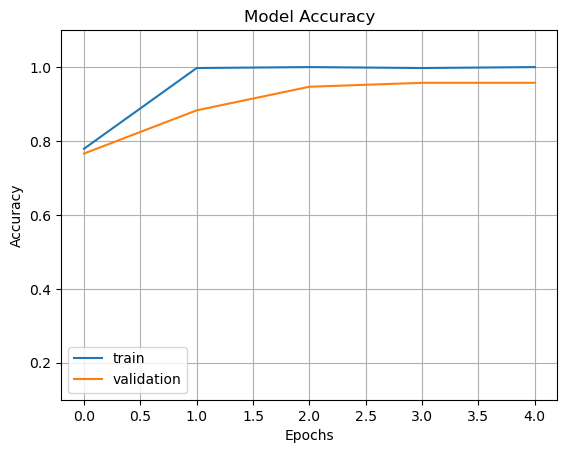

In [6]:
import matplotlib.pyplot as plt


fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1, ymax = 1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

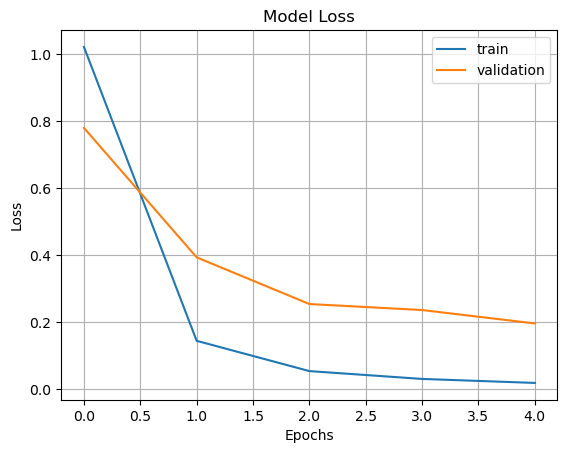

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show